# Contruindo um Pipeline ETL com Python - Analisando Rotatividade de uma Empresa no ano de 2022

Este é um desafio de projeto do **Santander Bootcamp 2023 - Ciência de Dados com Python.**

O projeto modelo tem o título **Explorando IA Generativa em um Pipeline de ETL com Python.**

[Clique para ver o notebook do projeto modelo](https://colab.research.google.com/drive/1SF_Q3AybFPozCcoFBptDSFbMk-6IVGF-?usp=sharing#scrollTo=k5fA5OrXt1a3)

## 🚀 Entendendo o desafio
Inspirado pelo projeto modelo o aluno deveria replicar ou reimaginar uma pipeline ETL utilizando Python.

## 📈 Meu projeto
Imaginando uma empresa com um grande volume de rotatividade, meu desafio é criar um pipeline ETL para extrair dados de admissões e rescisões do ano de 2022 de um arquivo CSV, realizar algumas transformações simples como agrupamento das admissões e rescisões de acordo com o mês e ano, e por fim realizar carregamento dos dados transformados em um novo arquivo CSV além de criar uma visualização em tela para mostrar o resultados por meio de gráficos.



# Extract
Nesta etapa vamos extrair os dados de admissões e rescisões do arquivo `Rotatividade.csv`. Este arquivo traz informações referentes ao ano de 2022 considerando o período de janeiro a dezembro. As colunas contidas no arquivo são as seguintes: `Colaborador`, `Data da Admissão` e `Data da Rescisão`.

In [3]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
file_path = "Rotatividade.csv"
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas do DataFrame para verificar os dados
print(df.head())

   Colaborador      Dt_Adm     Dt_Resc
0            1  08/08/1985  04/08/2022
1            2  03/10/1988  05/01/2022
2            3  11/10/1989  03/01/2022
3            4  01/01/1990  04/02/2022
4            5  05/03/1990  01/04/2022


# Transform
Nessa etapa realizei algumas tratativas para conseguir manipular os dados, posteriormente as informações são agrupadas por mês

In [4]:
# Convertendo as colunas para o tipo data
df['Dt_Adm'] = pd.to_datetime(df.Dt_Adm,dayfirst=True)
df['Dt_Adm'] = df['Dt_Adm'].dt.strftime('%d/%m/%Y')
df['Dt_Resc'] = pd.to_datetime(df.Dt_Resc,dayfirst=True)
df['Dt_Resc'] = df['Dt_Resc'].dt.strftime('%d/%m/%Y')

# Extraindo o mês e anos das colunas 'Data admissão e Data Rescisão'
df['MesAnoAdm'] = pd.to_datetime(df['Dt_Adm'],dayfirst=True).dt.year * 100 + pd.to_datetime(df['Dt_Adm'],dayfirst=True).dt.month
df['MesAnoResc'] = pd.to_datetime(df['Dt_Resc'],dayfirst=True).dt.year * 100 + pd.to_datetime(df['Dt_Resc'],dayfirst=True).dt.month
df['MesAdm'] = pd.to_datetime(df['Dt_Adm'],dayfirst=True).dt.month
df['MesResc'] = pd.to_datetime(df['Dt_Resc'],dayfirst=True).dt.month

# Criando novos dataframes para analisar somente colaboradores admitidos e demitidos em 2022
Admitidos = df[(df['MesAnoAdm'] >= 202201)]
Demitidos = df[(df['MesAnoResc'] >= 202201) & (df['MesAnoResc'] <= 202212)]


# Calculando o total de Admissões e Rescisões por mês no ano de 2022
total_adm_by_month = Admitidos.groupby('MesAdm')['Colaborador'].count()
total_resc_by_month = Demitidos.groupby('MesResc')['Colaborador'].count()

# Visualizando os resultados das transformações
print("Total de Admissões por Mês:")
print(total_adm_by_month)

print("\nTotal de Rescisões por Mês:")
print(total_resc_by_month)



Total de Admissões por Mês:
MesAdm
1.0     83
2.0     48
3.0     39
4.0     60
5.0     42
6.0     56
7.0     75
8.0     85
9.0     77
10.0    47
11.0    58
12.0    34
Name: Colaborador, dtype: int64

Total de Rescisões por Mês:
MesResc
1.0     67
2.0     71
3.0     43
4.0     59
5.0     38
6.0     80
7.0     58
8.0     62
9.0     70
10.0    39
11.0    49
12.0    83
Name: Colaborador, dtype: int64


# Load
Salvando os dados transformados em um novo arquivo CSV ou visualizando em tela.

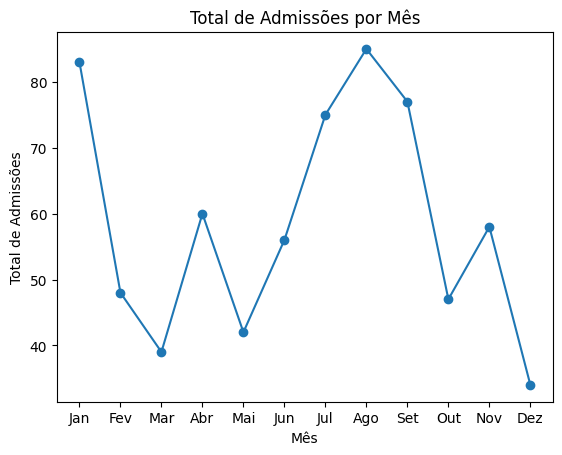

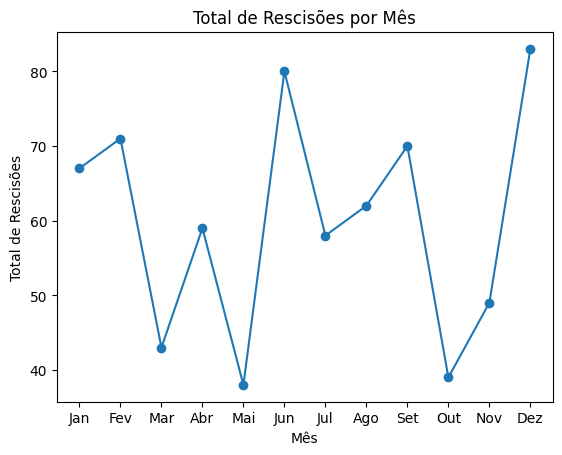

In [5]:
# Salvando os dados transformados em um arquivo CSV
total_adm_by_month.to_csv("total_adm_by_month.csv")
total_resc_by_month.to_csv("total_resc_by_month.csv")

# Criar uma visualização simples usando Matplotlib
import matplotlib.pyplot as plt

# Criando gráfico de linha para total de admissões por mês
total_adm_by_month.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Admissões')
plt.title('Total de Admissões por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

# Criando gráfico de linha para total de rescisões por mês
total_resc_by_month.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Rescisões')
plt.title('Total de Rescisões por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()